# KNN for Regression

In [2]:
# pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import mglearn
import matplotlib.pyplot as plt

In [15]:
# mglearn.plots.plot_knn_regression(n_neighbors=1)

NameError: name 'mglearn' is not defined

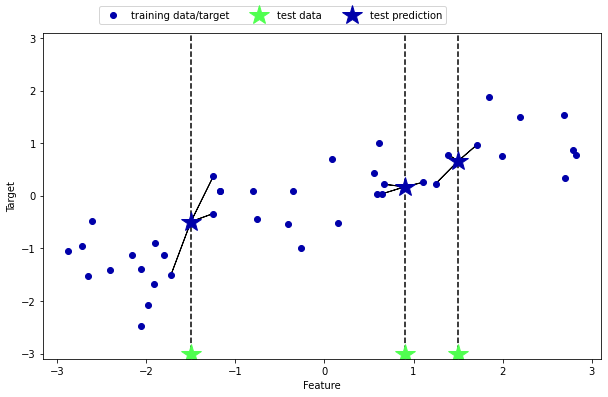

In [4]:
# mglearn.plots.plot_knn_regression(n_neighbors=3)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
# X, y = mglearn.datasets.make_wave(n_samples=40)# split the wave dataset into a training and a test set
import numpy as np
X = np.load("X.npy")
y = np.load("y.npy")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print(reg.score(X_test, y_test))

0.8344172446249605


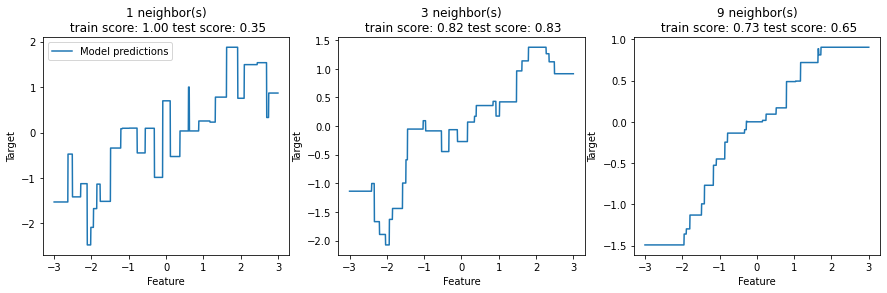

In [6]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    # ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),
    #          markersize=8)
    # ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, 
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

Interesting parameters for KNR
<br>
1. weights : {'uniform', 'distance'}
2. metric : {'minkowski', 'euclidean', 'manhattan', 'chebyshev' ...}
3. p : int (minkowski distance power, default = 2)

For more information visit
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# Try to implement yourself

Hints and subtasks
1. You can use the same dataset (X, y)
2. You will need distance function
3. You will need to find K closest points to the given one. You may start with the simple implementation of this algorithm.
3. In the same graphic draw train and test scores when changing K parameter (First try to imagine how should this look?).

In [8]:
# pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.metrics import r2_score

class KNNRegressor:
    def __init__(self, n_neighbours):
        self.y_train = None
        self.X_train = None
        self.n_neighbours = n_neighbours
        # todo: fit/predict/score


    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def distance(self, x1, x2):
        return np.linalg.norm(x1-x2, axis=1)

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
        #     arr = []
        #     for _x in self.X_train
        #         arr.append(self.distance(x, _x))
        #
        #     arr = np.array(arr)
        #     y_ind = np.argsort(arr)[:self.n_neighbours]
        #     y_pred.append(self.y_train[y_ind].mean())
        #
        # return y_pred
            dist = self.distance(x, self.X_train)

            y_ind = np.argsort(dist)[:self.n_neighbours]
            y_pred.append(self.y_train[y_ind].mean())

        return y_pred

    def score(self, X, y):
        y_pred = self.predict(X)

        return r2_score(y, y_pred)
        RSS = ((y - y_pred) ** 2).sum()
        TSS = ((y - y.mean()) ** 2).sum()
        return 1 - RSS/TSS

    # todo: try to optimize with this https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html
    # todo: add weights
#     todo: configure tf2

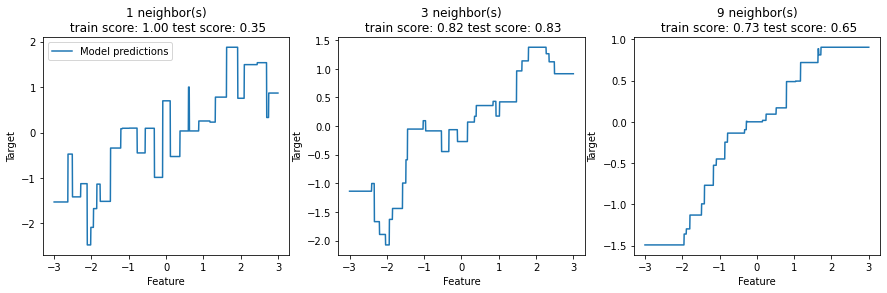

In [12]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNNRegressor(n_neighbours=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    # ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),
    #          markersize=8)
    # ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,
              reg.score(X_train, y_train),reg.score(X_test,
              y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")